# PCA with loadings


This is a common tool to find out which features in your dataset create variance and in R ```biplot()``` does this by default. In Python it is more involved, but with the code below you can do the same thing.


In [1]:
%load_ext nb_black
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


iris_obj = load_iris()
iris_df = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)

iris_df["species"] = [iris_obj.target_names[s] for s in iris_obj.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=2)),])

pca_data = pd.DataFrame(
    pipeline.fit_transform(iris_df.drop(columns=["species"])),
    columns=["PC1", "PC2"],
    index=iris_df.index,
)
pca_data["species"] = iris_df["species"]

pca_step = pipeline.steps[1][1]
loadings = pd.DataFrame(
    pca_step.components_.T,
    columns=["PC1", "PC2"],
    index=iris_df.drop(columns=["species"]).columns,
)

<IPython.core.display.Javascript object>

In [3]:
loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


<IPython.core.display.Javascript object>

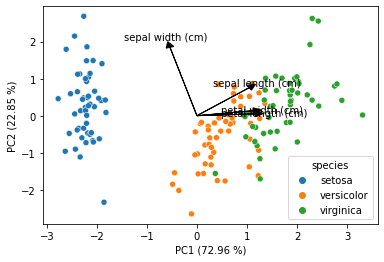

<IPython.core.display.Javascript object>

In [4]:
def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    """
    Based on this snippet from https://github.com/scentellegher/code_snippets/blob/master/pca_loadings/pca_loadings.ipynb
    """
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )


g = sns.scatterplot(data=pca_data, x="PC1", y="PC2", hue="species")

# Add loadings
loading_plot(loadings[["PC1", "PC2"]].values, loadings.index, scale=2, arrow_size=0.08)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC2 ({pca_step.explained_variance_ratio_[1]*100:.2f} %)")

plt.savefig("./img/PCA_with_loadings.png", dpi=200)
plt.show()